# Training an intents classification model

Define constants

In [1]:
from os import getcwd, path
import sys
import matplotlib.pyplot as plt
import numpy as np

BASE_PATH = path.dirname(getcwd())
sys.path.append(BASE_PATH)

DATA_UTILS = path.join(BASE_PATH, 'common/data_utils.py')
TRAIN_PATH = path.join(BASE_PATH, 'kc_data.json')
CLASSES_FILE = path.join(BASE_PATH, 'classes.json')

In [2]:
exec(open(DATA_UTILS).read())

Use functions from the utils to extract and preprocess the training data
Refer to `kc_data.json` for the sample data format
`get_data_pairs` is then used to parse data into a tuple of `([list_of_sentences], [list_of_labels])`

In [3]:
X_data, y_data = get_data_pairs(data_from_json(TRAIN_PATH))

classes = list(set(y_data))
num_classes = len(classes)

X_train = X_data
y_train = np.array([
    classes.index(item)
    for item in y_data
], dtype='float32')

Plot the training data

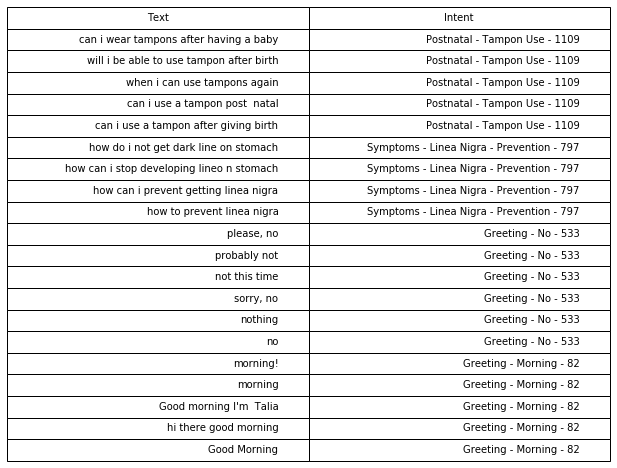

In [4]:
cell_text = [
    [item, y_data[idx] + ' - ' + str(int(y_train[idx]))] 
    for (idx, item) in enumerate(X_train)
]
plt.table(cellText=cell_text[:20],
          colLabels=['Text', 'Intent'],
          loc='center') \
   .scale(1.8,1.8)
plt.axis('off')
plt.show()

In [5]:
print('Number of samples: %s, classes: %s' % (len(X_train), num_classes))

Number of samples: 10256, classes: 1427


Save the classes descriptions as json

In [6]:
import json

with open(CLASSES_FILE, 'w') as classes_file:
    json.dump(classes, classes_file)

In [7]:
import torch
torch.__version__

'0.4.0a0+5463a4a'

Start training the classification model and save

In [8]:
training_data = [(item, y_train[idx]) for idx, item in enumerate(X_train)]

In [25]:
from common.utils import wordpunct_tokenize
from glove_utils import get_word_vector, get_emb_matrix
from config import MAX_NUM_WORDS
X_doc = []
for line in X_data:
    X_doc.extend(wordpunct_tokenize(line))
X_doc = list(filter(lambda x: x is not None, [get_word_vector(token) for token in X_doc]))

Plot the losses graph (this helps choosing number of epochs and learning rate)

In [ ]:
vectors = np.array(X_doc)
covar_doc = np.cov(np.transpose(vectors))
inv_covar_doc = np.linalg.pinv(covar_doc)
covar_lang = np.cov(np.transpose(get_emb_matrix()))
p = np.log(len(X_doc)) / np.log(MAX_NUM_WORDS)
numerator = covar_lang + p
first_term = np.matmul(vectors, inv_covar_doc)
last_term = np.linalg.pinv(vectors)
inner = np.matmul(np.matmul(first_term, numerator / (p + 1)), last_term)
cosal = np.sqrt(inner)

Test the trained model

In [ ]:
console.log(cosal)